# Introduction to pandas  

Pandas allows us to work with tables. We can load tables from files or generate them from dictionaries

### dictionaries

Dictionaries consist of pairs of keys and values:  
enter the key and get the value

In [1]:
d = {'China':{'population':1394880000,
              'co2':10641789},
     'India':{'population':1338860000,
              'co2':2454968},
     'United States':{'population':328082000,
                      'co2':5172336}
     }

In [2]:
d.keys()

dict_keys(['China', 'India', 'United States'])

In [3]:
d.values()

dict_values([{'population': 1394880000, 'co2': 10641789}, {'population': 1338860000, 'co2': 2454968}, {'population': 328082000, 'co2': 5172336}])

In [4]:
d['India']

{'population': 1338860000, 'co2': 2454968}

In [5]:
d['India']['population']

1338860000

## dictionaries can be transformed into tables (data frames)

For this, we load pandas

In [30]:
import pandas as pd

We turn the dictionary into a table

In [7]:
countries_df = pd.DataFrame(d)

In [8]:
countries_df

,China,India,United States
co2,10641789,2454968,5172336
population,1394880000,1338860000,328082000


The table/dataframe has columns, rows, and values

### columns

In [9]:
countries_df.columns

Index(['China', 'India', 'United States'], dtype='object')

### rows

In [10]:
countries_df.index

Index(['co2', 'population'], dtype='object')

### values

In [11]:
countries_df.values

array([[  10641789,    2454968,    5172336],
       [1394880000, 1338860000,  328082000]])

### Rows and columns can be switched by transposing (rotating 90°)

In [12]:
countries_df

,China,India,United States
co2,10641789,2454968,5172336
population,1394880000,1338860000,328082000


In [13]:
countries_df = countries_df.T

In [14]:
countries_df

,co2,population
China,10641789,1394880000
India,2454968,1338860000
United States,5172336,328082000


### Indexing of dataframes

We can select a specific row

In [15]:
countries_df.loc[['China'],:]

,co2,population
China,10641789,1394880000


Or a specific column

In [16]:
countries_df.loc[:,['population']]

,population
China,1394880000
India,1338860000
United States,328082000


we can select multiple rows or multiple columns, or combinations of the two

In [17]:
countries_df.loc[['China','India'],['population']]

,population
China,1394880000
India,1338860000


## First plotting

### we load the matplotlib module

In [18]:
import matplotlib.pyplot as plt

The population will be on the x-axis

In [19]:
countries_df.loc[:,['population']]

,population
China,1394880000
India,1338860000
United States,328082000


The CO2 emission will be on the y-axis 

In [20]:
countries_df.loc[:,['co2']]

,co2
China,10641789
India,2454968
United States,5172336


### A simple scatterplot

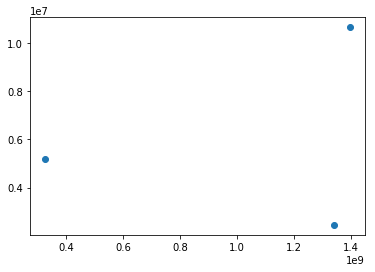

In [21]:
plt.plot(countries_df.loc[:,['population']],
         countries_df.loc[:,['co2']],
         'o'
        )

## Preview: Plotting more appealing figures

### we first import the seaborn module, which includes more appealing figure settings

In [22]:
import seaborn as sns

In [23]:
sns.set_context('talk')

### we save the values to variables for later re-use

In [24]:
x = countries_df.loc[:,['population']]
y = countries_df.loc[:,['co2']]

In [25]:
x

,population
China,1394880000
India,1338860000
United States,328082000


In [26]:
y

,co2
China,10641789
India,2454968
United States,5172336


### we divide the population by billion

In [27]:
x = x/1000000000.0

In [28]:
x

,population
China,1.394880
India,1.338860
United States,0.328082


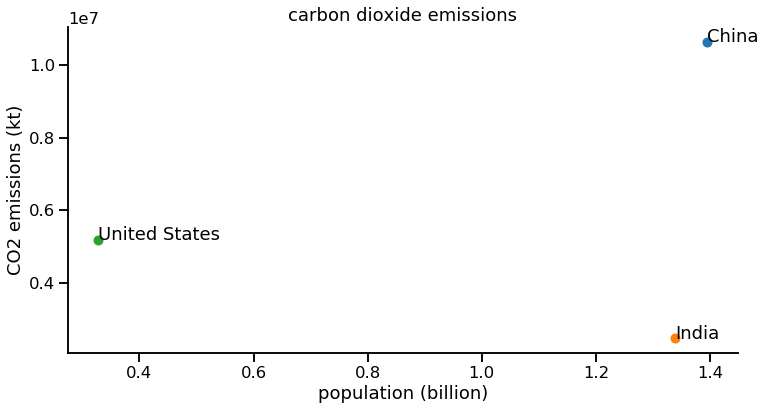

In [38]:
plt.figure(figsize=(12,6))

for i in x.index:
    plt.plot(x.loc[i,:],y.loc[i,:],'o')
    plt.annotate(xy=(x.loc[i,:],y.loc[i,:]),s=i)
    
plt.xlabel('population (billion)')
plt.ylabel('CO2 emissions (kt)')
plt.title('carbon dioxide emissions')

sns.despine()
plt.show()